Example code:

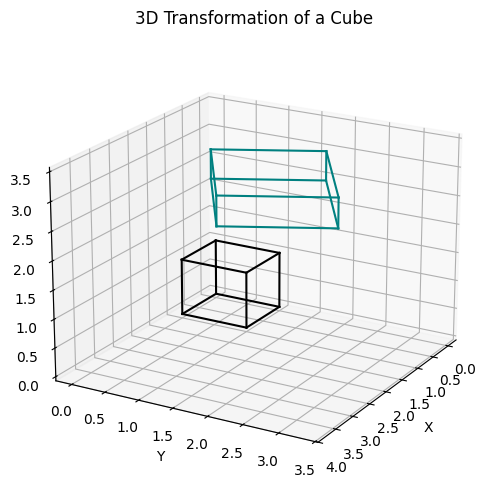

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

def make_unit_cube():
    pts = np.array([
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [0, 1, 1, 1],
    ]).T
    return pts
    

def plot_cube(ax, pts, style='b-'):
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 6), (6, 7), (7, 4),
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]
    
    xs, ys, zs = pts[0], pts[1], pts[2]

    for i, j in edges:
        ax.plot(
            [xs[i], xs[j]],
            [ys[i], ys[j]],
            [zs[i], zs[j]],
            style
        )


def transform_points(pts, M):
    return M @ pts


def example_3d_transform():
    cube = make_unit_cube()
    
    S = np.array([
        [2, 0, 0, 0],
        [0, 1.5, 0, 0],
        [0, 0, 0.5, 0],
        [0, 0, 0, 1]
    ])

    T = np.array([
        [1, 0, 0, 2],
        [0, 1, 0, 1],
        [0, 0, 1, 3],
        [0, 0, 0, 1]
    ])

    theta = np.pi / 6
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta),  np.cos(theta), 0, 0],
        [0, 0, 1, 0], 
        [0, 0, 0, 1]
    ])

    M = T @ Rz @ S
    cube_t = transform_points(cube, M)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    plot_cube(ax, cube, style='black')
    plot_cube(ax, cube_t, style='teal')

    ax.set_title("3D Transformation of a Cube")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(elev=20, azim=30)
    plt.show()

example_3d_transform()     

**Lab Tasks**

1. Construct a cube and draw it using matplotlib.

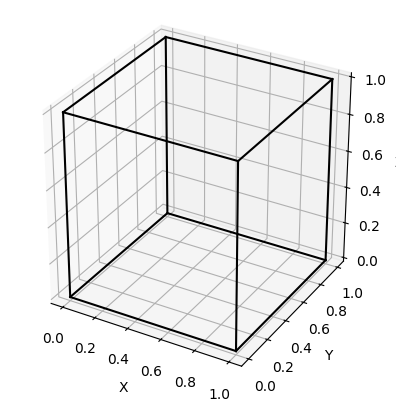

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    (0,1), (1,2), (2,3), (3,0),
    (4,5), (5,6), (6,7), (7,4),   
    (0,4), (1,5), (2,6), (3,7)    
]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    points = vertices[list(edge)]
    ax.plot(points[:,0], points[:,1], points[:,2], color='black')


ax.set_box_aspect([1,1,1])

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

2. Apply scaling, rotation and translation, and display both original and transformed cubes.

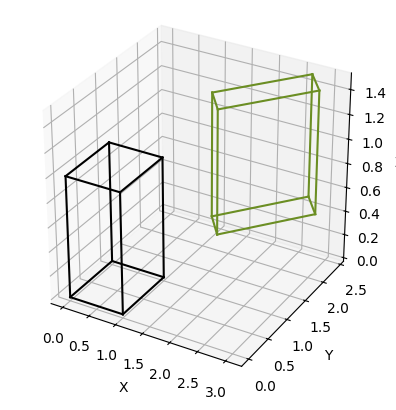

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    (0,1), (1,2), (2,3), (3,0),
    (4,5), (5,6), (6,7), (7,4),
    (0,4), (1,5), (2,6), (3,7)
]

def scale(vertices, sx, sy, sz):
    S = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, sz]
    ])
    return vertices @ S.T

def rotate_z(vertices, angle_deg):
    theta = np.radians(angle_deg)
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])
    return vertices @ Rz.T

def translate(vertices, tx, ty, tz):
    return vertices + np.array([tx, ty, tz])

transformed = scale(vertices, 1.5, 0.5, 1)
transformed = rotate_z(transformed, 45)
transformed = translate(transformed, 2, 1, 0.5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    pts = vertices[list(edge)]
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='black')

for edge in edges:
    pts = transformed[list(edge)]
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='olivedrab')

ax.set_box_aspect([1,1,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

3. Try different viewing angles using ax.view init() and observe the projection.

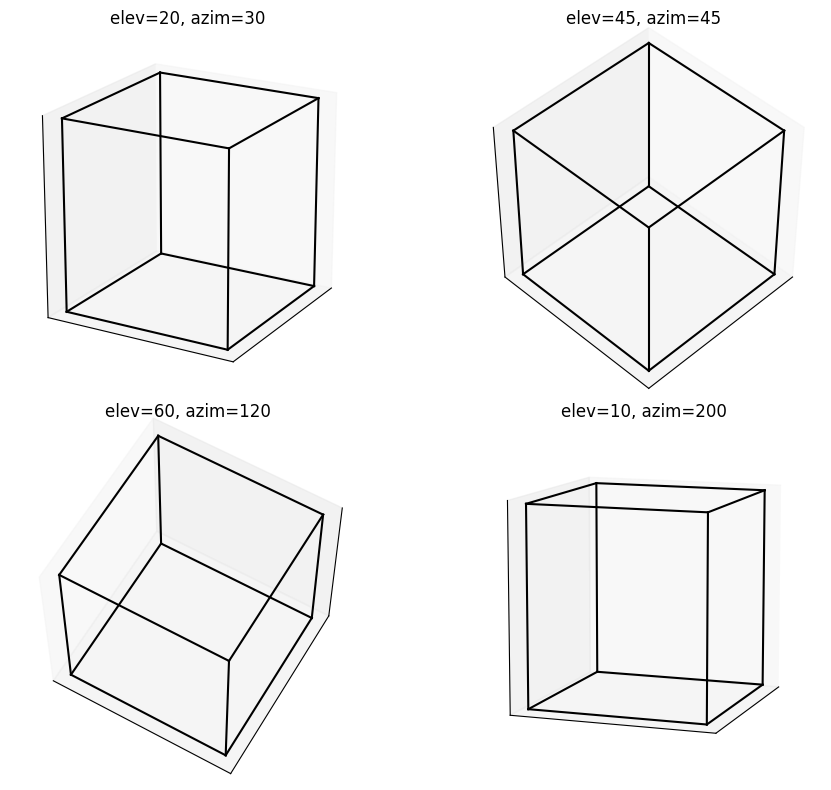

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    (0,1), (1,2), (2,3), (3,0),
    (4,5), (5,6), (6,7), (7,4),
    (0,4), (1,5), (2,6), (3,7)
]

views = [
    (20, 30),
    (45, 45),
    (60, 120),
    (10, 200)
]

fig = plt.figure(figsize=(10, 8))

for i, (elev, azim) in enumerate(views):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    
    for edge in edges:
        pts = vertices[list(edge)]
        ax.plot(pts[:,0], pts[:,1], pts[:,2], color='black')
    
    ax.set_box_aspect([1,1,1])
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"elev={elev}, azim={azim}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

plt.tight_layout()
plt.show()

**Lab Assignment**

1. Create a simple 3D house model (cube plus pyramid roof) and apply transformations.

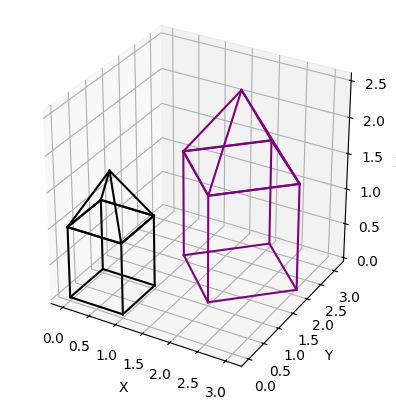

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cube = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

roof = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
    [0.5, 0.5, 1.7]   
])

cube_edges = [
    (0,1), (1,2), (2,3), (3,0),
    (4,5), (5,6), (6,7), (7,4),
    (0,4), (1,5), (2,6), (3,7)
]

roof_edges = [
    (0,1), (1,2), (2,3), (3,0),
    (0,4), (1,4), (2,4), (3,4)
]

def scale(points, sx, sy, sz):
    S = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, sz]
    ])
    return points @ S.T

def rotate_z(points, angle_deg):
    theta = np.radians(angle_deg)
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])
    return points @ Rz.T

def translate(points, tx, ty, tz):
    return points + np.array([tx, ty, tz])

cube_t = scale(cube, 1.5, 1.5, 1.5)
roof_t = scale(roof, 1.5, 1.5, 1.5)

cube_t = rotate_z(cube_t, 45)
roof_t = rotate_z(roof_t, 45)

cube_t = translate(cube_t, 2, 1, 0)
roof_t = translate(roof_t, 2, 1, 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for edge in cube_edges:
    pts = cube[list(edge)]
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='black')

for edge in roof_edges:
    pts = roof[list(edge)]
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='black')

for edge in cube_edges:
    pts = cube_t[list(edge)]
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='purple')

for edge in roof_edges:
    pts = roof_t[list(edge)]
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='purple')

ax.set_box_aspect([1,1,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

2. Implement rotations about the X-axis and Y-axis and compare their effects with
rotation about the Z-axis.

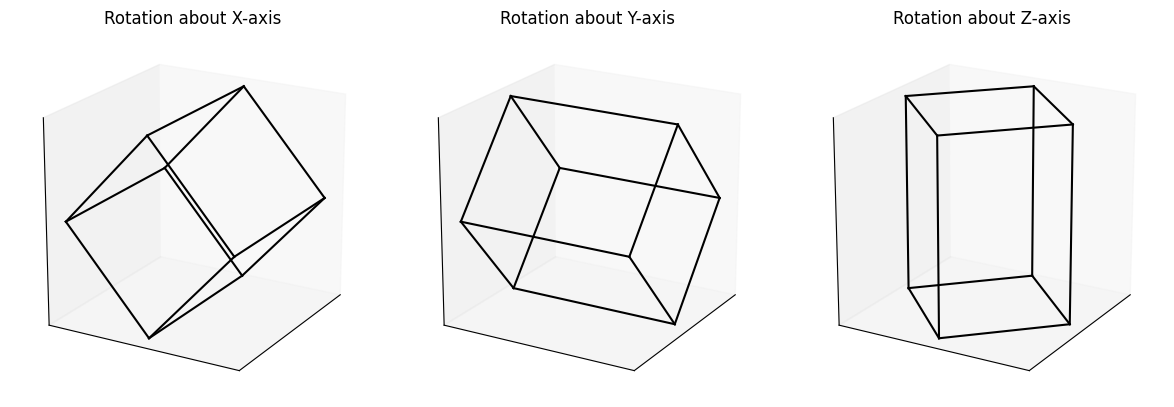

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    (0,1), (1,2), (2,3), (3,0),
    (4,5), (5,6), (6,7), (7,4),
    (0,4), (1,5), (2,6), (3,7)
]

def rotate_x(points, angle_deg):
    theta = np.radians(angle_deg)
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta),  np.cos(theta)]
    ])
    return points @ Rx.T

def rotate_y(points, angle_deg):
    theta = np.radians(angle_deg)
    Ry = np.array([
        [ np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return points @ Ry.T

def rotate_z(points, angle_deg):
    theta = np.radians(angle_deg)
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])
    return points @ Rz.T

angle = 45
cube_x = rotate_x(vertices, angle)
cube_y = rotate_y(vertices, angle)
cube_z = rotate_z(vertices, angle)

fig = plt.figure(figsize=(12, 4))

rotations = [
    (cube_x, "Rotation about X-axis"),
    (cube_y, "Rotation about Y-axis"),
    (cube_z, "Rotation about Z-axis")
]

for i, (cube_rot, title) in enumerate(rotations):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    
    for edge in edges:
        pts = cube_rot[list(edge)]
        ax.plot(pts[:,0], pts[:,1], pts[:,2], color='black')
    
    ax.set_box_aspect([1,1,1])
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(elev=20, azim=30)

plt.tight_layout()
plt.show()